### folium 활용ver.

#### 참고: https://teddylee777.github.io/visualization/folium

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import geopandas as gpd

In [19]:
geo = gpd.read_file('C:/Users/dkswl/MyPractice_220725/rowdata/HangJeongDong_ver20220401.geojson')
data = pd.read_csv('C:/Users/dkswl/MyPractice_220725/rowdata/서울특별시_강남구_전기차충전소.csv', encoding='cp949')

In [5]:
geo.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [6]:
data.head()

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,급속충전타입구분,완속충전기대수,급속충전기대수,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자
0,신구초교 공영노외주차장,압구정로18길 28,서울특별시,주말,0:00,0:00,Y,N,NaN,1.0,NaN,Y,서울특별시 강남구 압구정로18길 28,서울특별시 강남구 신사동 550-11,에버온/한카,02-1661-8206,37.523359,127.023991,2020-08-19
1,탄천2호 공영노외주차장,열원동 4-49,서울특별시,주말,0:00,0:00,N,Y,AC3상+DC차데모+DC콤보,1.0,1.0,Y,NaN,서울특별시 강남구 일원동 4-49,한국자동차환경협회전기차급속충전문의,02-1661-9408,37.493989,127.078626,2020-08-19
2,역삼1동문화센터 공영노외주차장,역삼로7길 22,서울특별시,주말,0:00,0:00,Y,N,NaN,1.0,NaN,Y,서울특별시 강남구 역삼로7길 22,서울특별시 강남구 역삼동 829-1,에버온,02-1661-7766,37.495619,127.032883,2020-08-19
3,도곡로21길 7 공영노외주차장,도곡로21길 7,서울특별시,주말,0:00,0:00,Y,N,NaN,1.0,NaN,Y,서울특별시 강남구 도곡로21길 7,서울특별시 강남구 역삼동 795-25,에버온,02-1661-7766,37.492550,127.038854,2020-08-19
4,치매지원센터 공영노외주차장,선릉로108길 27,서울특별시,주말,0:00,0:00,Y,N,NaN,1.0,NaN,Y,서울특별시 강남구 선릉로108길 27,서울특별시 강남구 삼성동 113-27,에버온/한카,02-1661-7766,37.510312,127.046384,2020-08-19


In [7]:
import folium
folium.__version__
from folium import plugins

In [20]:
# 강남구 중심좌표
center = [37.4894, 127.0655]
m = folium.Map(location = center, zoom_start = 15)

In [21]:
# folium.GeoJson(
#     geo,
#     name='지역구'
# ).add_to(m)

# m

In [22]:
points = data[['위도', '경도']]
points

,위도,경도
0,37.523359,127.023991
1,37.493989,127.078626
2,37.495619,127.032883
3,37.492550,127.038854
4,37.510312,127.046384
5,37.475293,127.051416
6,37.498505,127.055389
7,37.502022,127.063770
8,37.486323,127.036781
9,37.508491,127.026222


In [25]:
for i, j in zip(data['위도'], data['경도']):
    folium.Marker([i, j], 
                  popup = '강남구 충전소', 
                  tooltip = '전기차 충전소',
                  icon = folium.Icon('blue', icon = 'star')).add_to(m)

In [26]:
m

### geopandas 활용ver.

In [27]:
# !pip install wheel
# !pip install pipwin

In [28]:
# 피이싼 버전에 맞는 필수 의존성 패키지를 설치하는 코드 (순서를 지키는 것이 에러를 피하는 방법)
# GeoPandas 사용을 위해서는 연관된 모든 라이브러리를 설치해야함!!! (은근 번거롭군...)

# !pipwin install numpy
# !pipwin install pandas
# !pipwin install shapely
# !pipwin install gdal
# !pipwin install fiona
# !pipwin install pyproj
# !pipwin install six
# !pipwin install rtree
# !pipwin install geopandas

In [29]:
# !pip install geopandas

<AxesSubplot:>

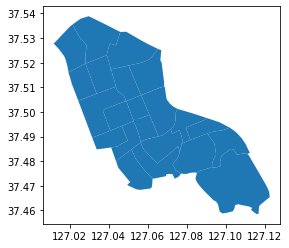

In [30]:
gcg = geo[geo['sggnm'] == '강남구']
m = gcg['geometry']
m.plot()

<AxesSubplot:>

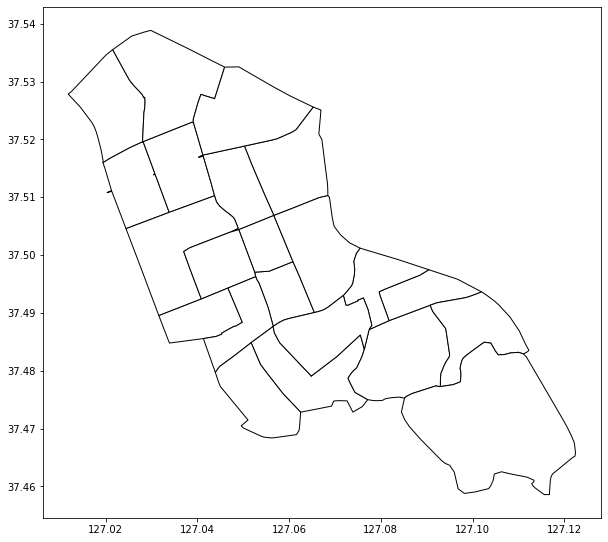

In [31]:
m.plot(color = 'white', edgecolor = 'black', figsize = (10,10))

In [32]:
gdata = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['경도'], data['위도']))
# longitude: 경도 / latitude: 위도

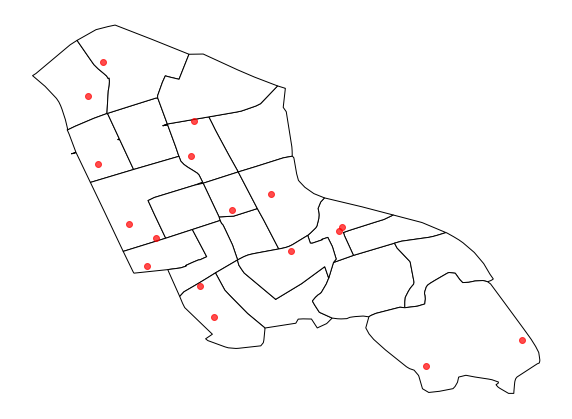

In [35]:
#전기차 충전소 위치 좌표 찍기

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트
ax = m.plot(color = 'white', edgecolor = 'black', figsize = (10,10))
gdata.plot(ax = ax, color = 'red', alpha = 0.7)
ax.set_axis_off()
plt.show()